# Project 2 Titanic Data

## Data Description

In this project I want to look at the titanic data set and answer a few questions based on statistic analysis. As a first step, I get an overall discription of the dataset from Kaggle.

Data Dictionary

Variable	Definition	Key
survival	Survival	0 = No, 1 = Yes
pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
sex	Sex	
Age	Age in years	
sibsp	# of siblings / spouses aboard the Titanic	
parch	# of parents / children aboard the Titanic	
ticket	Ticket number	
fare	Passenger fare	
cabin	Cabin number	
embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton
Variable Notes

pclass: A proxy for socio-economic status (SES)
1st = Upper
2nd = Middle
3rd = Lower

age: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5

sibsp: The dataset defines family relations in this way...
Sibling = brother, sister, stepbrother, stepsister
Spouse = husband, wife (mistresses and fiancés were ignored)

parch: The dataset defines family relations in this way...
Parent = mother, father
Child = daughter, son, stepdaughter, stepson
Some children travelled only with a nanny, therefore parch=0 for them

source - https://www.kaggle.com/c/titanic/data

## Questions

## Data Cleaning

In [88]:
# inline plot setting
%matplotlib inline

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# import libraries we need
import pandas as pd
from pandas import Series,DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="whitegrid")

# create the dataset in python
df_titanic_data = pd.read_csv('titanic-data.csv')

In [89]:
# take a look at the first few lines of the data
df_titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [90]:
# info of the dataset
df_titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [91]:
# Number of missing values
df_titanic_data.isnull().sum()


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [92]:
#Number of Duplicated Rows
print '{} Duplicated Rows'.format(df_titanic_data.duplicated().sum())

0 Duplicated Rows


In [93]:
#remove unrelated columns from the dataset
df_titanic = df_titanic_data.drop(['PassengerId','Name','Ticket','Cabin', 'Fare','Embarked'], axis=1)

#view first few rows of the new dataset
df_titanic.head()


,Survived,Pclass,Sex,Age,SibSp,Parch
0,0,3,male,22.0,1,0
1,1,1,female,38.0,1,0
2,1,3,female,26.0,0,0
3,1,1,female,35.0,1,0
4,0,3,male,35.0,0,0


In [94]:
#view some description of the new dataset:
df_titanic.describe()

,Survived,Pclass,Age,SibSp,Parch
count,891.000000,891.000000,714.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594
std,0.486592,0.836071,14.526497,1.102743,0.806057
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000
50%,0.000000,3.000000,28.000000,0.000000,0.000000
75%,1.000000,3.000000,38.000000,1.000000,0.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000


## Data Analysis and Visulization

### Question 1

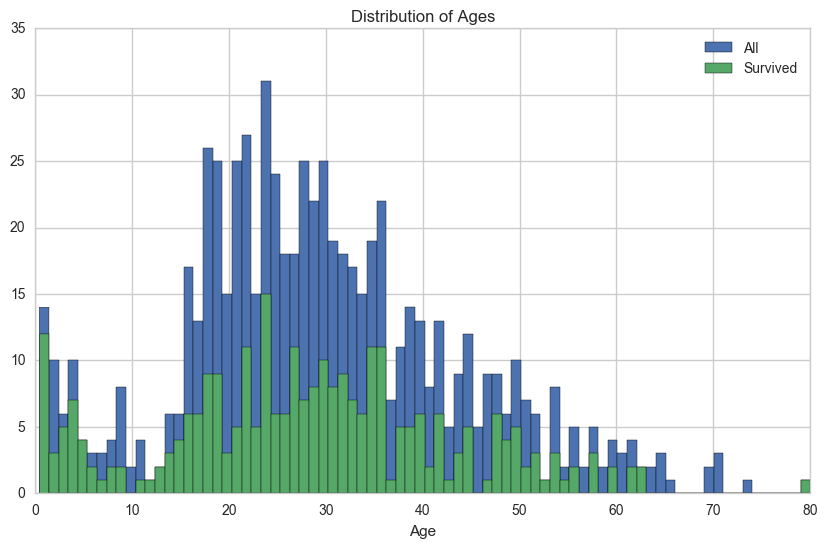

In [95]:
#histogram graph of age distribution
plt.figure(figsize=(10,6))

#for all passengers
df_titanic['Age'].hist(bins=80)

#for those survived
df_titanic[df_titanic['Survived'] == True]['Age'].hist(bins=80)

sns.plt.title('Distribution of Ages')
plt.xlabel('Age')
plt.legend(['All','Survived'])

In [104]:
#function to check if the passenger is less than 15 years old
def check_age(passenger):
    age,sex = passenger 
    if age < 15: 
        return 'child'
    else:
        return sex

#apply to the dataset
df_titanic['People'] = df_titanic[['Age', 'Sex']].apply(check_age,axis=1)

#check the first few rows of the modified dataset
df_titanic.head(10)

,Survived,Pclass,Sex,Age,SibSp,Parch,People
0,0,3,male,22.0,1,0,male
1,1,1,female,38.0,1,0,female
2,1,3,female,26.0,0,0,female
3,1,1,female,35.0,1,0,female
4,0,3,male,35.0,0,0,male
5,0,3,male,NaN,0,0,male
6,0,1,male,54.0,0,0,male
7,0,3,male,2.0,3,1,child
8,1,3,female,27.0,0,2,female
9,1,2,female,14.0,1,0,child


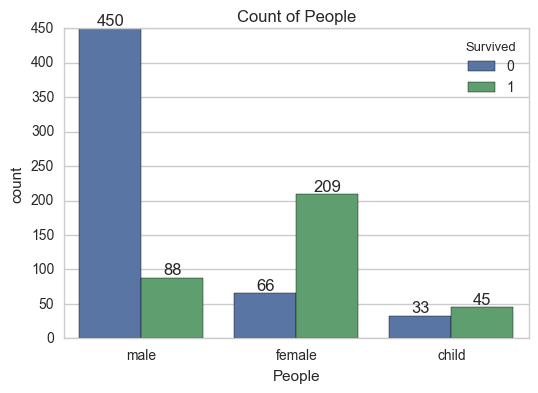

In [105]:
# Function to add values on top of bars in countplots
def annotate_bar(ax):
    for p in ax.patches:
        ax.text(p.get_x() + p.get_width()/2., 1*p.get_height(), '%d' % int(p.get_height()), ha='center', va='bottom')
        
#histogram graph of people count
plt.figure(figsize=(6,4))

pc = sns.countplot(x = 'People', data=df_titanic, hue = 'Survived')
annotate_bar(pc)
sns.plt.title('Count of People')

Overall Survivalbility: 
0.383838383838
Child Survivalbility: 
0.576923076923
Men Survivalbility: 
0.163568773234
Women Survivalbility: 
0.76


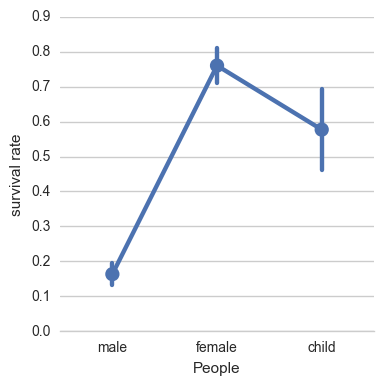

In [106]:
#Create seperate data set for each category in people column. This is because I also want to use this factor 
#in the second question.
Child_df = df_titanic[df_titanic.People =='child']
Men_df = df_titanic[df_titanic.People =='male']
Women_df = df_titanic[df_titanic.People =='female']

#calcutate survival rate for each group of people
overallProb = df_titanic.Survived.mean()
childProb = Child_df.Survived.mean()
womenProb = Women_df.Survived.mean()
menProb = Men_df.Survived.mean()

print("Overall Survivalbility: ")
print(overallProb)
print("Child Survivalbility: ")
print(childProb)
print("Men Survivalbility: ")
print(menProb)
print("Women Survivalbility: ")
print(womenProb)

#plot based on people category
pgs = sns.factorplot("People", "Survived", data=df_titanic, size=4)
pgs.despine(left=True)
pgs.set_ylabels("survival rate")

### Qustion 2

In [107]:
#Find the survivalbility for people in each class, regardless of other factors.
def classsurvival(x):
    df_class = df_titanic[df_titanic.Pclass == x]
    survival_rate = df_class.Survived.mean()
    return survival_rate

print("Class 1 Survivalbility:")
print(classsurvival(1))
print("Class 2 Survivalbility:")
print(classsurvival(2))
print("Class 1 Survivalbility:")
print(classsurvival(3))

Class 1 Survivalbility:
0.62962962963
Class 2 Survivalbility:
0.472826086957
Class 1 Survivalbility:
0.242362525458


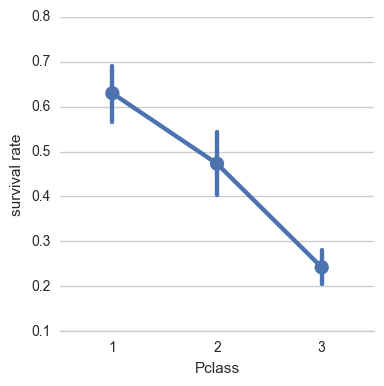

In [108]:
#plot survivalbility based on class category
cs = sns.factorplot("Pclass", "Survived", data=df_titanic, size=4)
cs.despine(left=True)
cs.set_ylabels("survival rate")

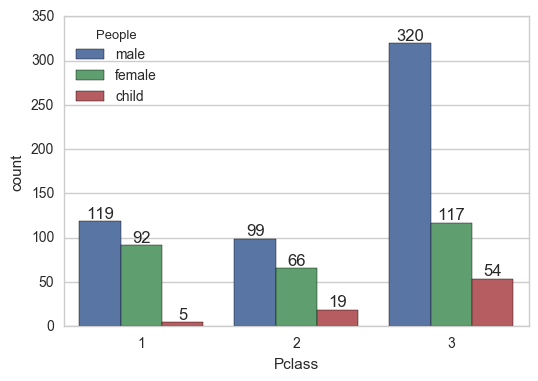

In [109]:
#Count of Passengers in different classes
plt.figure(figsize=(6,4))
CPC= sns.countplot(x='Pclass',order=[1,2,3], data=df_titanic, hue='People')
annotate_bar(CPC)


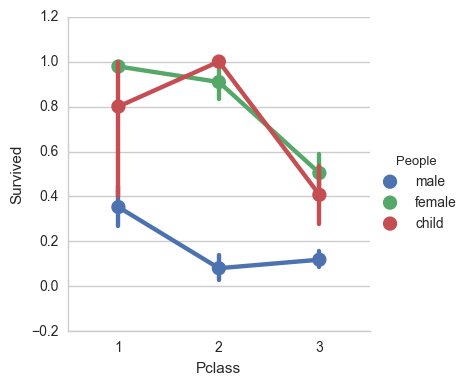

In [110]:
#Plot of survival rate for all classes, based on different people group
sns.factorplot("Pclass", "Survived", hue='People',order=[1,2,3], data=df_titanic, kind='point')

In [111]:
#function to check if a child has a family member around
def guardian_check(kid):
    sib,parch = kid 
    if sib ==0 and parch==0: 
        return 'No'
    else:
        return 'Yes'

#apply to the dataset
Child_df['Guardian'] = Child_df[['SibSp', 'Parch']].apply(guardian_check,axis=1)

#check the first few rows of the modified dataset
Child_df.head()


/Users/sicongchen/anaconda/envs/DAND/lib/python2.7/site-packages/ipykernel/__main__.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,Survived,Pclass,Sex,Age,SibSp,Parch,People,Guardian
7,0,3,male,2.0,3,1,child,Yes
9,1,2,female,14.0,1,0,child,Yes
10,1,3,female,4.0,1,1,child,Yes
14,0,3,female,14.0,0,0,child,No
16,0,3,male,2.0,4,1,child,Yes


In [114]:
Child_df.Guardian.isnull().sum()

0

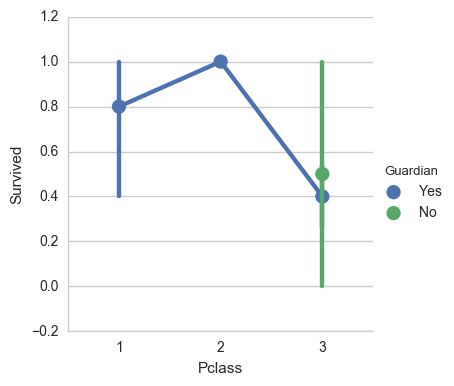

In [115]:
#Plot of survival rate for all classes, based on different people group
sns.factorplot("Pclass", "Survived", hue='Guardian',order=[1,2,3], data=Child_df, kind='point')

## Conclustion